In [142]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline

Many of the cells ran in this notebook are from or modified version of this data exploration kernel on Kaggle:
https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

In [143]:
pd.options.display.max_columns = 150


# Read in data
train = pd.read_csv('costa-rican-household-poverty-prediction/train.csv')
test = pd.read_csv('costa-rican-household-poverty-prediction/test.csv')
# look at train
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [144]:
# look at test
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [145]:
# get dimensions of both, way more test data which is interesting
print(train.shape)
print(test.shape)

(9557, 143)
(23856, 142)


In [146]:
# find types of data, we have mostly ints, a few floats and objects
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


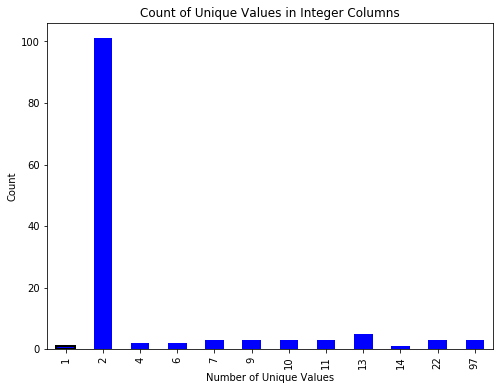

In [147]:
# Look at all columns that are integers to see how many are binary
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

In [148]:
# Look at number of nan's for integers, no nan's
pd.options.display.max_rows = 150
train.select_dtypes(np.int64).isna().sum().sort_index()

SQBage             0
SQBedjefe          0
SQBescolari        0
SQBhogar_nin       0
SQBhogar_total     0
Target             0
abastaguadentro    0
abastaguafuera     0
abastaguano        0
age                0
agesq              0
area1              0
area2              0
bedrooms           0
cielorazo          0
computer           0
coopele            0
dis                0
elimbasu1          0
elimbasu2          0
elimbasu3          0
elimbasu4          0
elimbasu5          0
elimbasu6          0
energcocinar1      0
energcocinar2      0
energcocinar3      0
energcocinar4      0
epared1            0
epared2            0
epared3            0
escolari           0
estadocivil1       0
estadocivil2       0
estadocivil3       0
estadocivil4       0
estadocivil5       0
estadocivil6       0
estadocivil7       0
etecho1            0
etecho2            0
etecho3            0
eviv1              0
eviv2              0
eviv3              0
female             0
hacapo             0
hacdor       

In [149]:
# find number of na's in integers for test
test.select_dtypes(np.int64).isna().sum().sort_index()

SQBage             0
SQBedjefe          0
SQBescolari        0
SQBhogar_nin       0
SQBhogar_total     0
abastaguadentro    0
abastaguafuera     0
abastaguano        0
age                0
agesq              0
area1              0
area2              0
bedrooms           0
cielorazo          0
computer           0
coopele            0
dis                0
elimbasu1          0
elimbasu2          0
elimbasu3          0
elimbasu4          0
elimbasu5          0
elimbasu6          0
energcocinar1      0
energcocinar2      0
energcocinar3      0
energcocinar4      0
epared1            0
epared2            0
epared3            0
escolari           0
estadocivil1       0
estadocivil2       0
estadocivil3       0
estadocivil4       0
estadocivil5       0
estadocivil6       0
estadocivil7       0
etecho1            0
etecho2            0
etecho3            0
eviv1              0
eviv2              0
eviv3              0
female             0
hacapo             0
hacdor             0
hhsize       

In [150]:
# find number of na's in floats for train
train.select_dtypes(np.float64).isna().sum().sort_index()

SQBdependency         0
SQBmeaned             5
SQBovercrowding       0
meaneduc              5
overcrowding          0
rez_esc            7928
v18q1              7342
v2a1               6860
dtype: int64

In [151]:
# find number of na's in floats for test
test.select_dtypes(np.float64).isna().sum().sort_index()

SQBdependency          0
SQBmeaned             31
SQBovercrowding        0
meaneduc              31
overcrowding           0
rez_esc            19653
v18q1              18126
v2a1               17403
dtype: int64

In [152]:
# find number of na's in obejcts for train
train.select_dtypes(object).isna().sum().sort_index()

Id            0
dependency    0
edjefa        0
edjefe        0
idhogar       0
dtype: int64

In [153]:
# find number of na's in obejcts for train
test.select_dtypes(object).isna().sum().sort_index()

Id            0
dependency    0
edjefa        0
edjefe        0
idhogar       0
dtype: int64

In [154]:
# Look at most important categorical features HERE




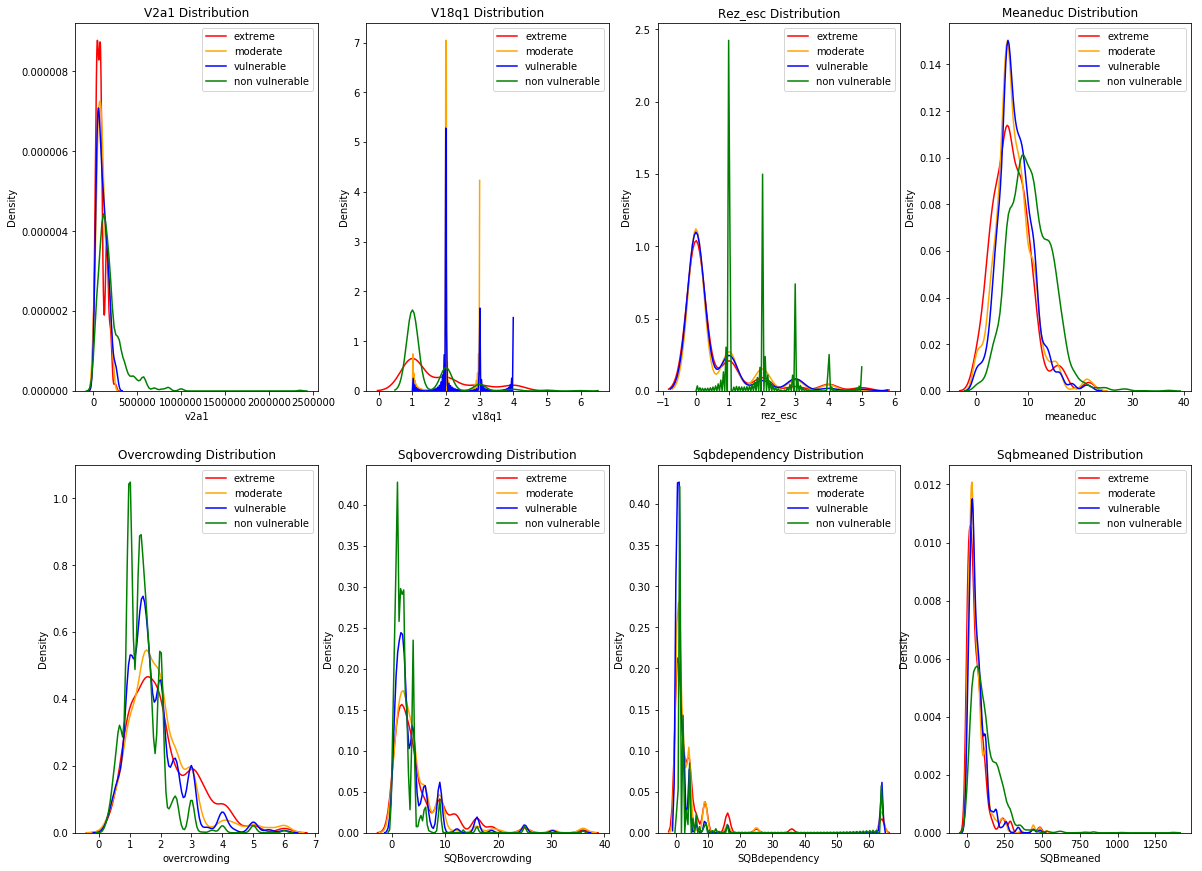

In [159]:
# plot distribution of all float values train
plt.figure(figsize = (20, 6))


# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(2, 4, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

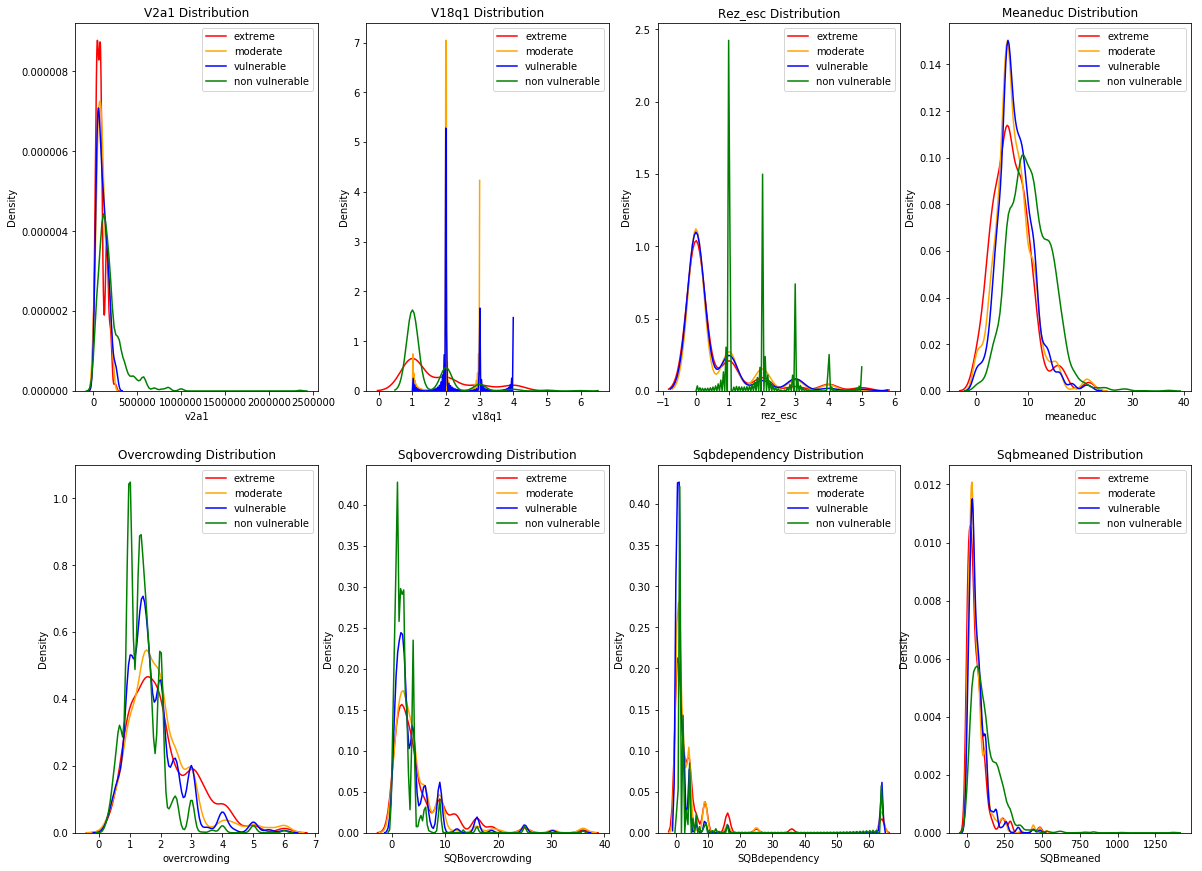

In [160]:
# plot distribution of all float values test
plt.figure(figsize = (20, 6))


# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(test.select_dtypes('float')):
    ax = plt.subplot(2, 4, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [45]:
# look at list of all values for the object values
# looks like for the edjefa , edjefe features they are numbers with the additon of no and yes values

for i, col in enumerate(train.select_dtypes('object')):
    print(train.groupby(col)['Id'].nunique())

Id
ID_0005f1903    1
ID_000603f5e    1
ID_000694a57    1
ID_000b240d7    1
ID_000ba4f4f    1
ID_00186dde5    1
ID_001db8579    1
ID_001ed8ac7    1
ID_002242b5b    1
ID_0026ce239    1
ID_002c68c5a    1
ID_00379d6dd    1
ID_0040a7ea8    1
ID_004710494    1
ID_0049fa939    1
ID_005bd0747    1
ID_005cb39c3    1
ID_005dada23    1
ID_00629ddb2    1
ID_0063aa209    1
ID_00721ed96    1
ID_007309845    1
ID_008635054    1
ID_0087f7b1d    1
ID_00958797d    1
ID_009603cd8    1
ID_009ba9a39    1
ID_00a3edd2a    1
ID_00ad96fd1    1
ID_00b19f4f1    1
ID_00b3f6e91    1
ID_00b57e3ac    1
ID_00b7179b8    1
ID_00c5b02dd    1
ID_00da43675    1
ID_00e18b86c    1
ID_00e1a2af0    1
ID_00e338068    1
ID_00e5bb156    1
ID_00f84ddbf    1
ID_00f87485f    1
ID_0102dc04b    1
ID_010a9e5a9    1
ID_010c72f02    1
ID_012411ec3    1
ID_012685333    1
ID_012b0d963    1
ID_012bcdcc9    1
ID_012c91cfa    1
ID_01319aa12    1
ID_014151bdb    1
ID_01462b000    1
ID_0147c1e3a    1
ID_01493bddb    1
ID_014f6b533    1
ID_0160

In [47]:
# do same for rest
for i, col in enumerate(test.select_dtypes('object')):
    print(train.groupby(col)['Id'].nunique())

Id
ID_0005f1903    1
ID_000603f5e    1
ID_000694a57    1
ID_000b240d7    1
ID_000ba4f4f    1
ID_00186dde5    1
ID_001db8579    1
ID_001ed8ac7    1
ID_002242b5b    1
ID_0026ce239    1
ID_002c68c5a    1
ID_00379d6dd    1
ID_0040a7ea8    1
ID_004710494    1
ID_0049fa939    1
ID_005bd0747    1
ID_005cb39c3    1
ID_005dada23    1
ID_00629ddb2    1
ID_0063aa209    1
ID_00721ed96    1
ID_007309845    1
ID_008635054    1
ID_0087f7b1d    1
ID_00958797d    1
ID_009603cd8    1
ID_009ba9a39    1
ID_00a3edd2a    1
ID_00ad96fd1    1
ID_00b19f4f1    1
ID_00b3f6e91    1
ID_00b57e3ac    1
ID_00b7179b8    1
ID_00c5b02dd    1
ID_00da43675    1
ID_00e18b86c    1
ID_00e1a2af0    1
ID_00e338068    1
ID_00e5bb156    1
ID_00f84ddbf    1
ID_00f87485f    1
ID_0102dc04b    1
ID_010a9e5a9    1
ID_010c72f02    1
ID_012411ec3    1
ID_012685333    1
ID_012b0d963    1
ID_012bcdcc9    1
ID_012c91cfa    1
ID_01319aa12    1
ID_014151bdb    1
ID_01462b000    1
ID_0147c1e3a    1
ID_01493bddb    1
ID_014f6b533    1
ID_0160

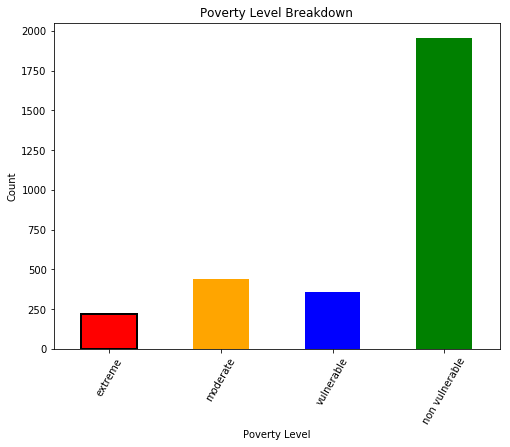

In [51]:
# look at break down of income classes for train, only for head of household!
# don't want to count multiple times for larger households

# Heads of household
heads = train.loc[train['parentesco1'] == 1].copy()

# Labels for training
train_labels = train.loc[(train['Target'].notnull()) & (train['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');


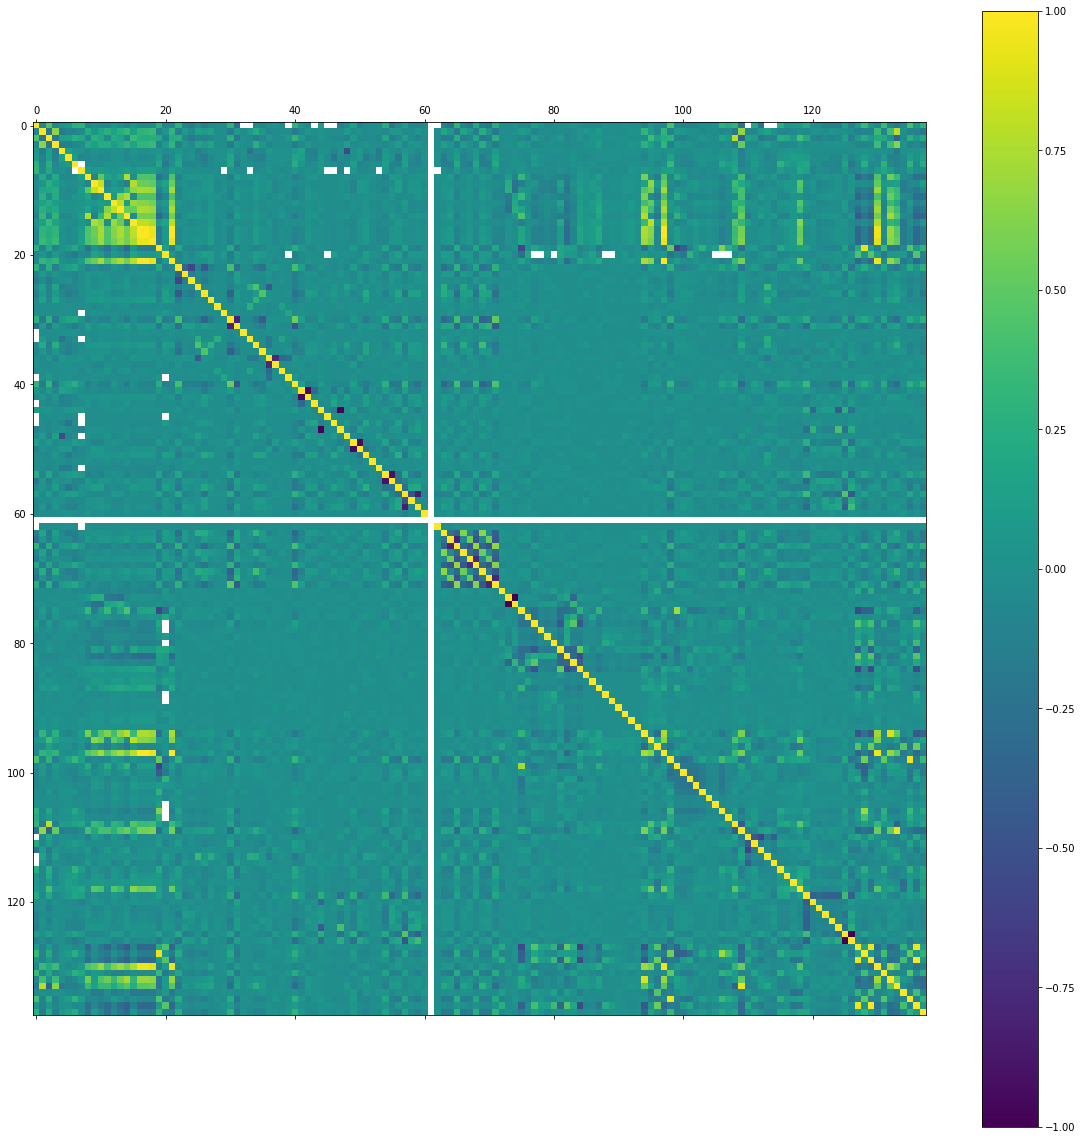

In [66]:
# Correlation plot for all data
plt.figure(figsize=(20,20))
plt.matshow(train.corr(), fignum=1)
plt.colorbar()
plt.legend()

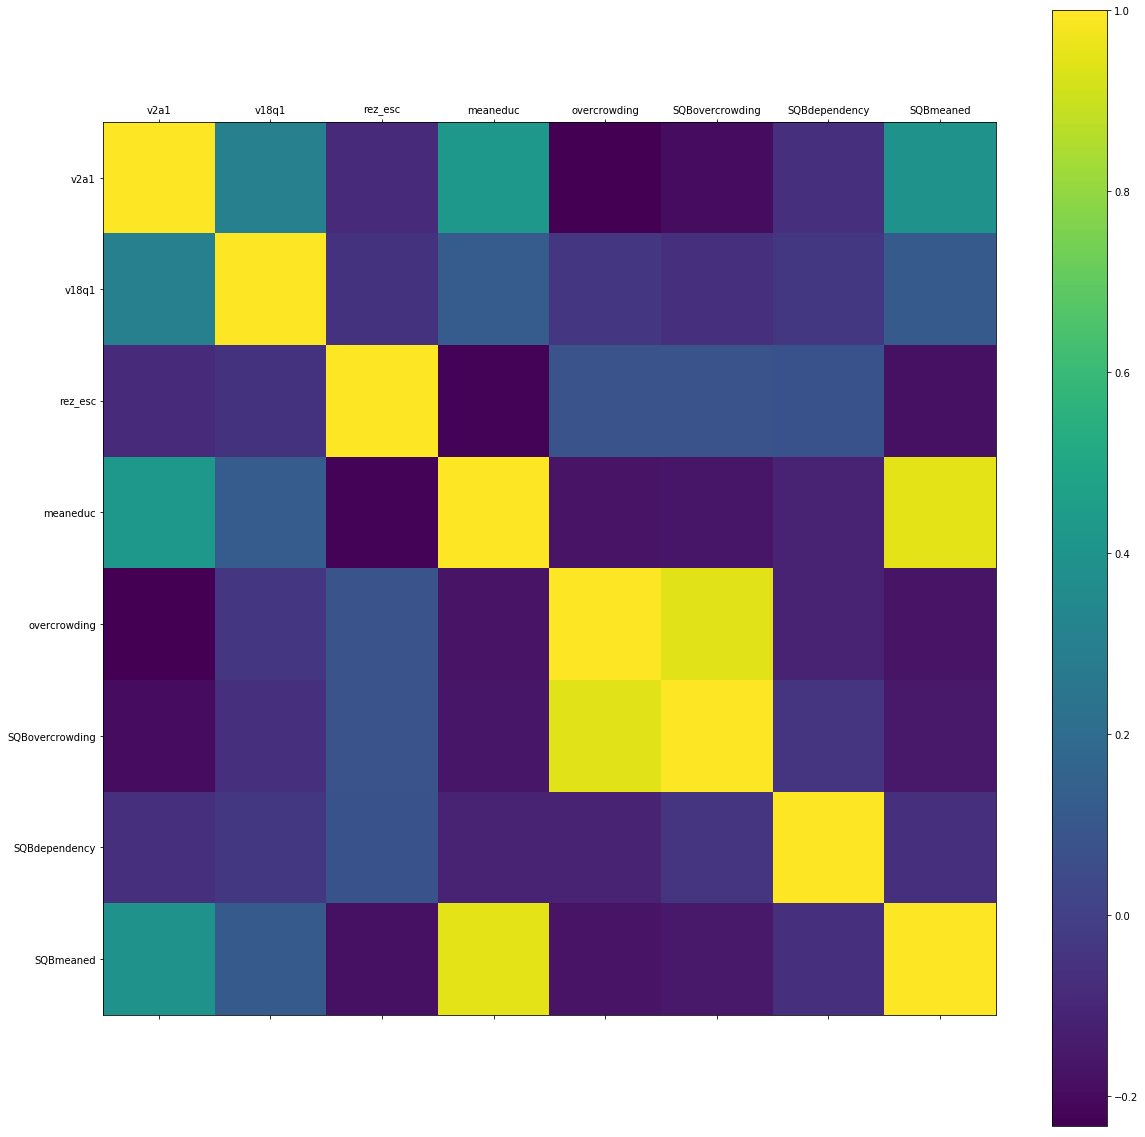

In [86]:
# Correlation plot for all integer data
alpha = train.select_dtypes(np.float64).columns

plt.figure(figsize=(20,20))
plt.matshow(train.select_dtypes(np.float64).corr(), fignum=1)
plt.colorbar()
plt.xticks(np.arange(0,len(alpha)), ['']+alpha)
plt.yticks(np.arange(0,len(alpha)), ['']+alpha)
plt.legend()

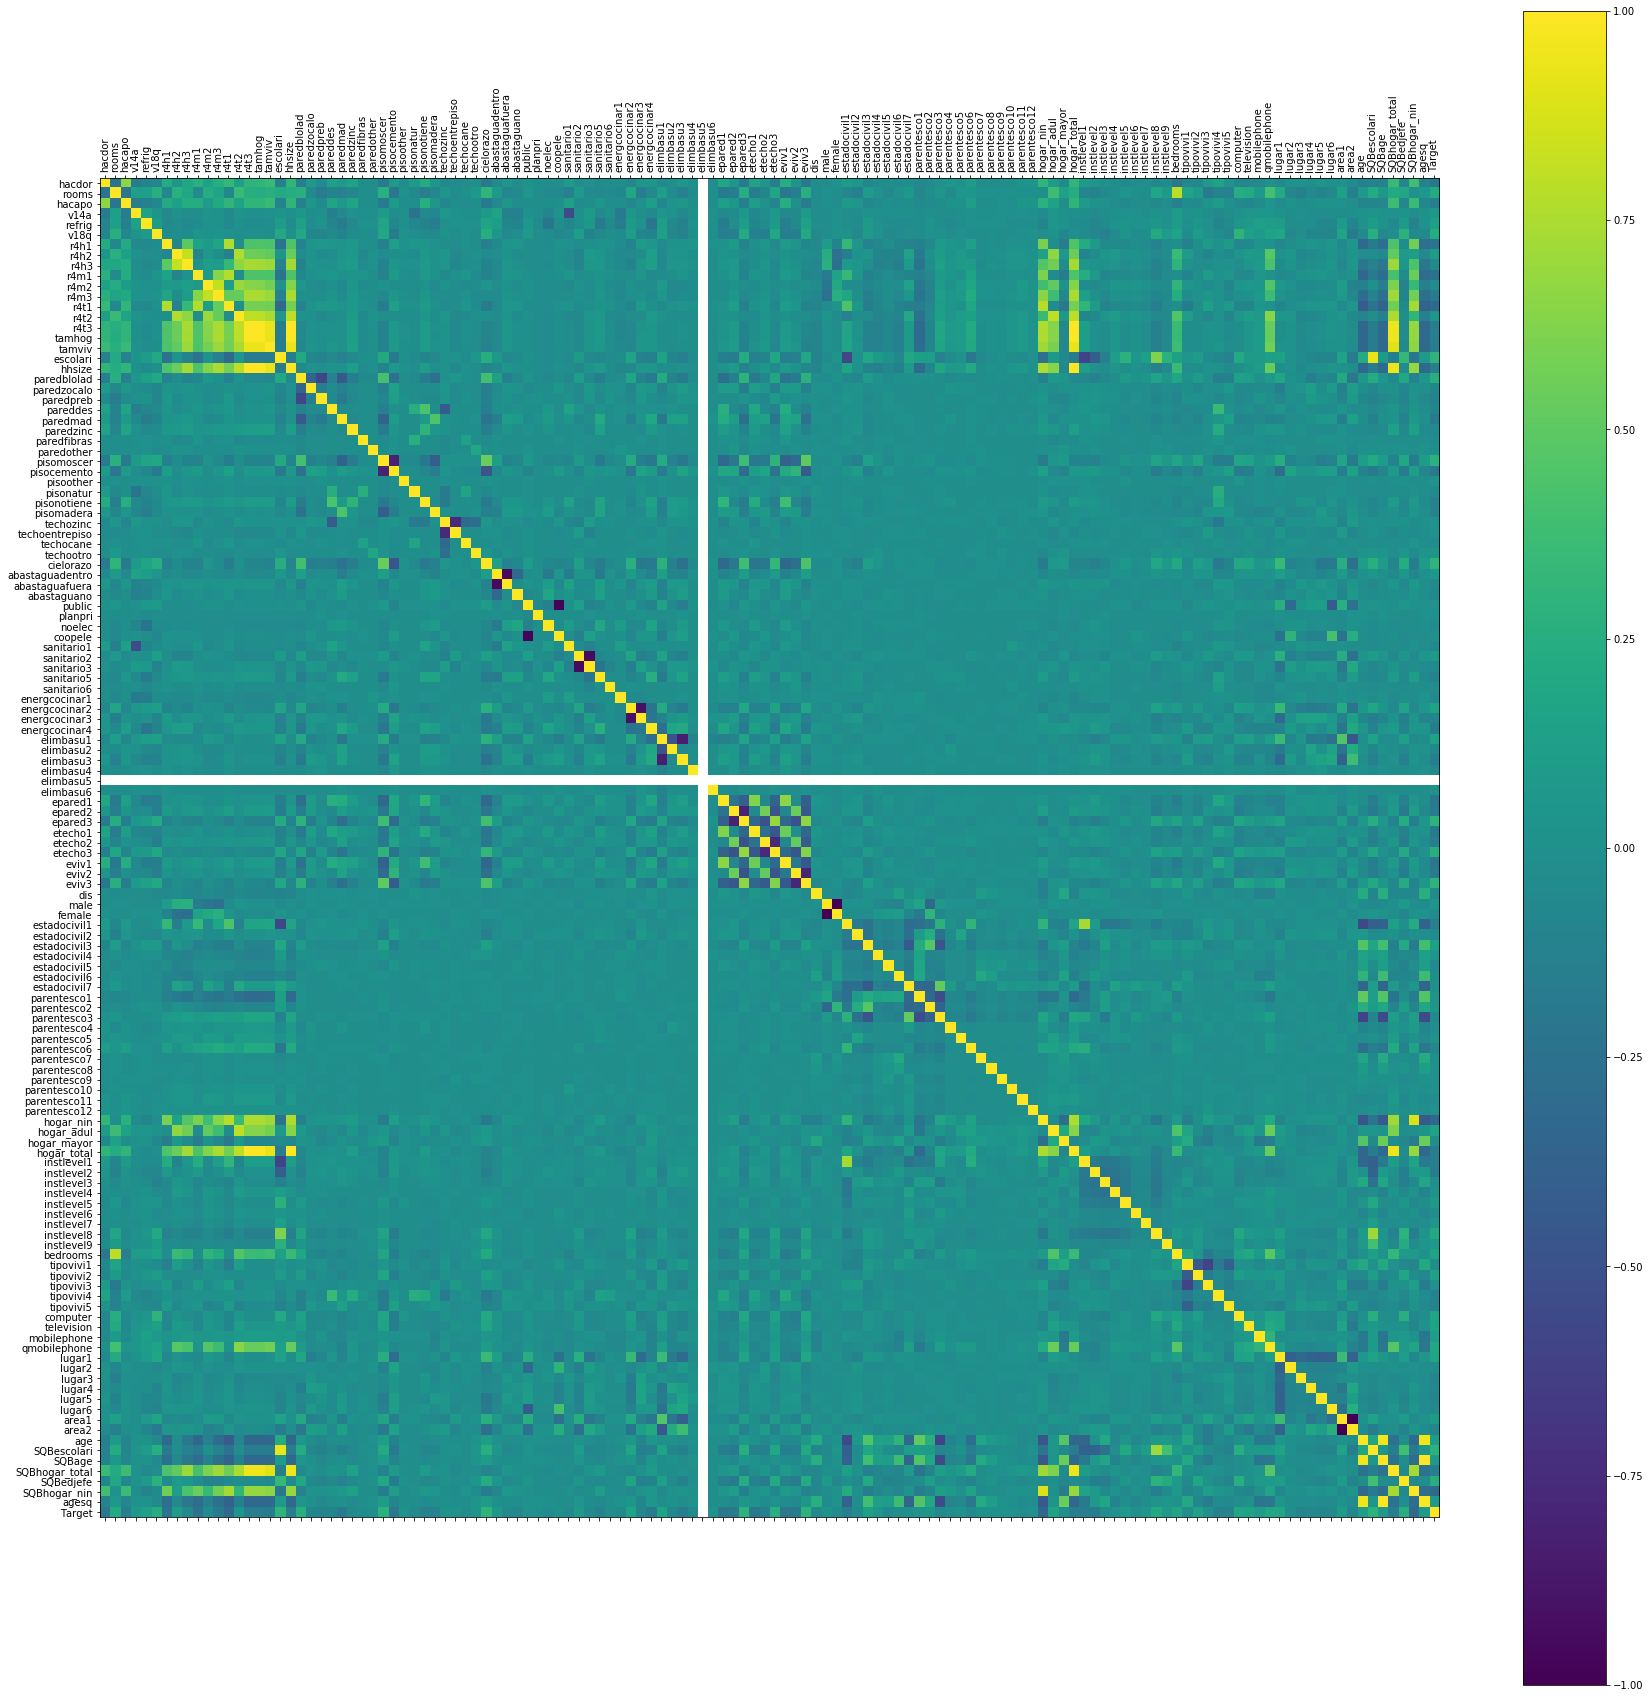

In [83]:
# Correlation plot for all integer data
alpha = train.select_dtypes(np.int64).columns

plt.figure(figsize=(30,30))
plt.matshow(train.select_dtypes(np.int64).corr(), fignum=1)
plt.colorbar()
plt.xticks(np.arange(0,len(alpha)), ['']+alpha, rotation = 'vertical')
plt.yticks(np.arange(0,len(alpha)), ['']+alpha)
plt.legend()

In [88]:
# only 1 value for elimbasu5
train['elimbasu5'].nunique()

1

In [90]:
# begin processing data for xgboost model
# this only transforms the idhogar field, the other things this function used to do are done elsewhere
def encode_data(df):
    df['idhogar'] = LabelEncoder().fit_transform(df['idhogar'])

# plot feature importance for sklearn decision trees    
def feature_importance(forest, X_train, display_results=True):
    ranked_list = []
    zero_features = []
    
    importances = forest.feature_importances_

    indices = np.argsort(importances)[::-1]
    
    if display_results:
        # Print the feature ranking
        print("Feature ranking:")

    for f in range(X_train.shape[1]):
        if display_results:
            print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]) + " - " + X_train.columns[indices[f]])
        
        ranked_list.append(X_train.columns[indices[f]])
        
        if importances[indices[f]] == 0.0:
            zero_features.append(X_train.columns[indices[f]])
            
    return ranked_list, zero_features


In [92]:
def do_features(df):
    feats_div = [('children_fraction', 'r4t1', 'r4t3'), 
                 ('working_man_fraction', 'r4h2', 'r4t3'),
                 ('all_man_fraction', 'r4h3', 'r4t3'),
                 ('human_density', 'tamviv', 'rooms'),
                 ('human_bed_density', 'tamviv', 'bedrooms'),
                 ('rent_per_person', 'v2a1', 'r4t3'),
                 ('rent_per_room', 'v2a1', 'rooms'),
                 ('mobile_density', 'qmobilephone', 'r4t3'),
                 ('tablet_density', 'v18q1', 'r4t3'),
                 ('mobile_adult_density', 'qmobilephone', 'r4t2'),
                 ('tablet_adult_density', 'v18q1', 'r4t2'),
                ]
    
    feats_sub = [('people_not_living', 'tamhog', 'tamviv'),
                 ('people_weird_stat', 'tamhog', 'r4t3')]

    for f_new, f1, f2 in feats_div:
        df['fe_' + f_new] = (df[f1] / df[f2]).astype(np.float32)       
    for f_new, f1, f2 in feats_sub:
        df['fe_' + f_new] = (df[f1] - df[f2]).astype(np.float32)
    
    # aggregation rules over household
    aggs_num = {'age': ['min', 'max', 'mean'],
                'escolari': ['min', 'max', 'mean']
               }
    
    aggs_cat = {'dis': ['mean']}
    for s_ in ['estadocivil', 'parentesco', 'instlevel']:
        for f_ in [f_ for f_ in df.columns if f_.startswith(s_)]:
            aggs_cat[f_] = ['mean', 'count']

    # aggregation over household
    for name_, df_ in [('18', df.query('age >= 18'))]:
        df_agg = df_.groupby('idhogar').agg({**aggs_num, **aggs_cat}).astype(np.float32)
        df_agg.columns = pd.Index(['agg' + name_ + '_' + e[0] + "_" + e[1].upper() for e in df_agg.columns.tolist()])
        df = df.join(df_agg, how='left', on='idhogar')
        del df_agg

    # Drop id's
    df.drop(['Id'], axis=1, inplace=True)
    
    return df

In [93]:
# convert one hot encoded fields to label encoding
def convert_OHE2LE(df):
    tmp_df = df.copy(deep=True)
    for s_ in ['pared', 'piso', 'techo', 'abastagua', 'sanitario', 'energcocinar', 'elimbasu', 
               'epared', 'etecho', 'eviv', 'estadocivil', 'parentesco', 
               'instlevel', 'lugar', 'tipovivi',
               'manual_elec']:
        if 'manual_' not in s_:
            cols_s_ = [f_ for f_ in df.columns if f_.startswith(s_)]
        elif 'elec' in s_:
            cols_s_ = ['public', 'planpri', 'noelec', 'coopele']
        sum_ohe = tmp_df[cols_s_].sum(axis=1).unique()
        #deal with those OHE, where there is a sum over columns == 0
        if 0 in sum_ohe:
            print('The OHE in {} is incomplete. A new column will be added before label encoding'
                  .format(s_))
            # dummy colmn name to be added
            col_dummy = s_+'_dummy'
            # add the column to the dataframe
            tmp_df[col_dummy] = (tmp_df[cols_s_].sum(axis=1) == 0).astype(np.int8)
            # add the name to the list of columns to be label-encoded
            cols_s_.append(col_dummy)
            # proof-check, that now the category is complete
            sum_ohe = tmp_df[cols_s_].sum(axis=1).unique()
            if 0 in sum_ohe:
                 print("The category completion did not work")
        tmp_cat = tmp_df[cols_s_].idxmax(axis=1)
        tmp_df[s_ + '_LE'] = LabelEncoder().fit_transform(tmp_cat).astype(np.int16)
        if 'parentesco1' in cols_s_:
            cols_s_.remove('parentesco1')
        tmp_df.drop(cols_s_, axis=1, inplace=True)
    return tmp_df

In [94]:
test_ids = test.Id

def process_df(df_):
    # encode the idhogar
    encode_data(df_)
    
    # create aggregate features
    return do_features(df_)

train = process_df(train)
test = process_df(test)

In [95]:
# some dependencies are Na, fill those with the square root of the square
train['dependency'] = np.sqrt(train['SQBdependency'])
test['dependency'] = np.sqrt(test['SQBdependency'])

# fill "no"s for education with 0s
train.loc[train['edjefa'] == "no", "edjefa"] = 0
train.loc[train['edjefe'] == "no", "edjefe"] = 0
test.loc[test['edjefa'] == "no", "edjefa"] = 0
test.loc[test['edjefe'] == "no", "edjefe"] = 0

# if education is "yes" and person is head of household, fill with escolari
train.loc[(train['edjefa'] == "yes") & (train['parentesco1'] == 1), "edjefa"] = train.loc[(train['edjefa'] == "yes") & (train['parentesco1'] == 1), "escolari"]
train.loc[(train['edjefe'] == "yes") & (train['parentesco1'] == 1), "edjefe"] = train.loc[(train['edjefe'] == "yes") & (train['parentesco1'] == 1), "escolari"]

test.loc[(test['edjefa'] == "yes") & (test['parentesco1'] == 1), "edjefa"] = test.loc[(test['edjefa'] == "yes") & (test['parentesco1'] == 1), "escolari"]
test.loc[(test['edjefe'] == "yes") & (test['parentesco1'] == 1), "edjefe"] = test.loc[(test['edjefe'] == "yes") & (test['parentesco1'] == 1), "escolari"]

# this field is supposed to be interaction between gender and escolari, but it isn't clear what "yes" means, let's fill it with 4
train.loc[train['edjefa'] == "yes", "edjefa"] = 4
train.loc[train['edjefe'] == "yes", "edjefe"] = 4

test.loc[test['edjefa'] == "yes", "edjefa"] = 4
test.loc[test['edjefe'] == "yes", "edjefe"] = 4

# convert to int for our models
train['edjefe'] = train['edjefe'].astype("int")
train['edjefa'] = train['edjefa'].astype("int")
test['edjefe'] = test['edjefe'].astype("int")
test['edjefa'] = test['edjefa'].astype("int")

# create feature with max education of either head of household
train['edjef'] = np.max(train[['edjefa','edjefe']], axis=1)
test['edjef'] = np.max(test[['edjefa','edjefe']], axis=1)

# fill some nas
train['v2a1']=train['v2a1'].fillna(0)
test['v2a1']=test['v2a1'].fillna(0)

test['v18q1']=test['v18q1'].fillna(0)
train['v18q1']=train['v18q1'].fillna(0)

train['rez_esc']=train['rez_esc'].fillna(0)
test['rez_esc']=test['rez_esc'].fillna(0)

train.loc[train.meaneduc.isnull(), "meaneduc"] = 0
train.loc[train.SQBmeaned.isnull(), "SQBmeaned"] = 0

test.loc[test.meaneduc.isnull(), "meaneduc"] = 0
test.loc[test.SQBmeaned.isnull(), "SQBmeaned"] = 0

# fix some inconsistencies in the data - some rows indicate both that the household does and does not have a toilet, 
# if there is no water we'll assume they do not
train.loc[(train.v14a ==  1) & (train.sanitario1 ==  1) & (train.abastaguano == 0), "v14a"] = 0
train.loc[(train.v14a ==  1) & (train.sanitario1 ==  1) & (train.abastaguano == 0), "sanitario1"] = 0

test.loc[(test.v14a ==  1) & (test.sanitario1 ==  1) & (test.abastaguano == 0), "v14a"] = 0
test.loc[(test.v14a ==  1) & (test.sanitario1 ==  1) & (test.abastaguano == 0), "sanitario1"] = 0

In [96]:
def train_test_apply_func(train_, test_, func_):
    test_['Target'] = 0
    xx = pd.concat([train_, test_])

    xx_func = func_(xx)
    train_ = xx_func.iloc[:train_.shape[0], :]
    test_  = xx_func.iloc[train_.shape[0]:, :].drop('Target', axis=1)

    del xx, xx_func
    return train_, test_

In [97]:
train, test = train_test_apply_func(train, test, convert_OHE2LE)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


The OHE in techo is incomplete. A new column will be added before label encoding
The OHE in instlevel is incomplete. A new column will be added before label encoding
The OHE in manual_elec is incomplete. A new column will be added before label encoding


In [98]:
cols_2_ohe = ['eviv_LE', 'etecho_LE', 'epared_LE', 'elimbasu_LE', 
              'energcocinar_LE', 'sanitario_LE', 'manual_elec_LE',
              'pared_LE']
cols_nums = ['age', 'meaneduc', 'dependency', 
             'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total',
             'bedrooms', 'overcrowding']

def convert_geo2aggs(df_):
    tmp_df = pd.concat([df_[(['lugar_LE', 'idhogar']+cols_nums)],
                        pd.get_dummies(df_[cols_2_ohe], 
                                       columns=cols_2_ohe)],axis=1)

    geo_agg = tmp_df.groupby(['lugar_LE','idhogar']).mean().groupby('lugar_LE').mean().astype(np.float32)
    geo_agg.columns = pd.Index(['geo_' + e for e in geo_agg.columns.tolist()])
    
    del tmp_df
    return df_.join(geo_agg, how='left', on='lugar_LE')

# add some aggregates by geography
train, test = train_test_apply_func(train, test, convert_geo2aggs)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
# add the number of people over 18 in each household
train['num_over_18'] = 0
train['num_over_18'] = train[train.age >= 18].groupby('idhogar').transform("count")
train['num_over_18'] = train.groupby("idhogar")["num_over_18"].transform("max")
train['num_over_18'] = train['num_over_18'].fillna(0)

test['num_over_18'] = 0
test['num_over_18'] = test[test.age >= 18].groupby('idhogar').transform("count")
test['num_over_18'] = test.groupby("idhogar")["num_over_18"].transform("max")
test['num_over_18'] = test['num_over_18'].fillna(0)

# add some extra features, these were taken from another kernel
def extract_features(df):
    df['bedrooms_to_rooms'] = df['bedrooms']/df['rooms']
    df['rent_to_rooms'] = df['v2a1']/df['rooms']
    df['tamhog_to_rooms'] = df['tamhog']/df['rooms'] # tamhog - size of the household
    df['r4t3_to_tamhog'] = df['r4t3']/df['tamhog'] # r4t3 - Total persons in the household
    df['r4t3_to_rooms'] = df['r4t3']/df['rooms'] # r4t3 - Total persons in the household
    df['v2a1_to_r4t3'] = df['v2a1']/df['r4t3'] # rent to people in household
    df['v2a1_to_r4t3'] = df['v2a1']/(df['r4t3'] - df['r4t1']) # rent to people under age 12
    df['hhsize_to_rooms'] = df['hhsize']/df['rooms'] # rooms per person
    df['rent_to_hhsize'] = df['v2a1']/df['hhsize'] # rent to household size
    df['rent_to_over_18'] = df['v2a1']/df['num_over_18']
    # some households have no one over 18, use the total rent for those
    df.loc[df.num_over_18 == 0, "rent_to_over_18"] = df[df.num_over_18 == 0].v2a1
    
extract_features(train)    
extract_features(test)  

In [100]:
# drop duplicated columns
needless_cols = ['r4t3', 'tamhog', 'tamviv', 'hhsize', 'v18q', 'v14a', 'agesq',
                 'mobilephone', 'female', ]

instlevel_cols = [s for s in train.columns.tolist() if 'instlevel' in s]

needless_cols.extend(instlevel_cols)

train = train.drop(needless_cols, axis=1)
test = test.drop(needless_cols, axis=1)


In [101]:
def split_data(train, y, sample_weight=None, households=None, test_percentage=0.20, seed=None):
    # uncomment for extra randomness
#     np.random.seed(seed=seed)
    
    train2 = train.copy()
    
    # pick some random households to use for the test data
    cv_hhs = np.random.choice(households, size=int(len(households) * test_percentage), replace=False)
    
    # select households which are in the random selection
    cv_idx = np.isin(households, cv_hhs)
    X_test = train2[cv_idx]
    y_test = y[cv_idx]

    X_train = train2[~cv_idx]
    y_train = y[~cv_idx]
    
    if sample_weight is not None:
        y_train_weights = sample_weight[~cv_idx]
        return X_train, y_train, X_test, y_test, y_train_weights
    
    return X_train, y_train, X_test, y_test


In [102]:
X = train.query('parentesco1==1')
# X = train.copy()

# pull out and drop the target variable
y = X['Target'] - 1
X = X.drop(['Target'], axis=1)

np.random.seed(seed=None)

train2 = X.copy()

train_hhs = train2.idhogar

households = train2.idhogar.unique()
cv_hhs = np.random.choice(households, size=int(len(households) * 0.15), replace=False)

cv_idx = np.isin(train2.idhogar, cv_hhs)

X_test = train2[cv_idx]
y_test = y[cv_idx]

X_train = train2[~cv_idx]
y_train = y[~cv_idx]

# train on entire dataset
X_train = train2
y_train = y

train_households = X_train.idhogar


In [105]:
# figure out the class weights for training with unbalanced classes
y_train_weights = class_weight.compute_sample_weight('balanced', y_train, indices=None)

In [106]:
# drop some features which aren't used by the LGBM or have very low importance
extra_drop_features = [
 'agg18_estadocivil1_MEAN',
 'agg18_estadocivil6_COUNT',
 'agg18_estadocivil7_COUNT',
 'agg18_parentesco10_COUNT',
 'agg18_parentesco11_COUNT',
 'agg18_parentesco12_COUNT',
 'agg18_parentesco1_COUNT',
 'agg18_parentesco2_COUNT',
 'agg18_parentesco3_COUNT',
 'agg18_parentesco4_COUNT',
 'agg18_parentesco5_COUNT',
 'agg18_parentesco6_COUNT',
 'agg18_parentesco7_COUNT',
 'agg18_parentesco8_COUNT',
 'agg18_parentesco9_COUNT',
 'geo_elimbasu_LE_4',
 'geo_energcocinar_LE_1',
 'geo_energcocinar_LE_2',
 'geo_epared_LE_0',
 'geo_hogar_mayor',
 'geo_manual_elec_LE_2',
 'geo_pared_LE_3',
 'geo_pared_LE_4',
 'geo_pared_LE_5',
 'geo_pared_LE_6',
 'num_over_18',
 'parentesco_LE',
 'rez_esc']

In [107]:
xgb_drop_cols = extra_drop_features + ["idhogar",  'parentesco1']

In [112]:
# some stats for features used by the classifer
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 9552
Columns: 175 entries, SQBage to rent_to_over_18
dtypes: float32(104), float64(19), int16(15), int64(37)
memory usage: 2.6 MB


In [111]:
# This is like a train, val split
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 40 to 9535
Columns: 175 entries, SQBage to rent_to_over_18
dtypes: float32(104), float64(19), int16(15), int64(37)
memory usage: 392.0 KB


In [123]:
# number of na's
pd.options.display.max_rows = 200
X_train.isna().sum().sort_index()

SQBage                         0
SQBdependency                  0
SQBedjefe                      0
SQBescolari                    0
SQBhogar_nin                   0
SQBhogar_total                 0
SQBmeaned                      0
SQBovercrowding                0
abastagua_LE                   0
age                            0
agg18_age_MAX                  0
agg18_age_MEAN                 0
agg18_age_MIN                  0
agg18_dis_MEAN                 0
agg18_escolari_MAX             0
agg18_escolari_MEAN            0
agg18_escolari_MIN             0
agg18_estadocivil1_COUNT       0
agg18_estadocivil1_MEAN        0
agg18_estadocivil2_COUNT       0
agg18_estadocivil2_MEAN        0
agg18_estadocivil3_COUNT       0
agg18_estadocivil3_MEAN        0
agg18_estadocivil4_COUNT       0
agg18_estadocivil4_MEAN        0
agg18_estadocivil5_COUNT       0
agg18_estadocivil5_MEAN        0
agg18_estadocivil6_COUNT       0
agg18_estadocivil6_MEAN        0
agg18_estadocivil7_COUNT       0
agg18_esta

In [117]:
# number of na's
# 15 in actual test data
test.isna().sum().sort_index()

SQBage                       0
SQBdependency                0
SQBedjefe                    0
SQBescolari                  0
SQBhogar_nin                 0
SQBhogar_total               0
SQBmeaned                    0
SQBovercrowding              0
abastagua_LE                 0
age                          0
agg18_age_MAX               15
agg18_age_MEAN              15
agg18_age_MIN               15
agg18_dis_MEAN              15
agg18_escolari_MAX          15
agg18_escolari_MEAN         15
agg18_escolari_MIN          15
agg18_estadocivil1_COUNT    15
agg18_estadocivil1_MEAN     15
agg18_estadocivil2_COUNT    15
agg18_estadocivil2_MEAN     15
agg18_estadocivil3_COUNT    15
agg18_estadocivil3_MEAN     15
agg18_estadocivil4_COUNT    15
agg18_estadocivil4_MEAN     15
agg18_estadocivil5_COUNT    15
agg18_estadocivil5_MEAN     15
agg18_estadocivil6_COUNT    15
agg18_estadocivil6_MEAN     15
agg18_estadocivil7_COUNT    15
agg18_estadocivil7_MEAN     15
agg18_parentesco10_COUNT    15
agg18_pa

In [113]:
'''further on feature importance is calculated, 
but we will use the top 10 features here to delve deeper into those variables
Feature ranking:
1. feature 11 (0.057015) - agg18_age_MEAN
2. feature 0 (0.044951) - SQBage
3. feature 10 (0.037019) - agg18_age_MAX
4. feature 12 (0.036358) - agg18_age_MIN
5. feature 15 (0.034374) - agg18_escolari_MEAN
6. feature 6 (0.034044) - SQBmeaned
7. feature 14 (0.024624) - agg18_escolari_MAX
8. feature 65 (0.022310) - fe_rent_per_person
9. feature 3 (0.021815) - SQBescolari
10. feature 1 (0.021154) - SQBdependency
'''
top_feature_list = ["agg18_age_MEAN",
                    "SQBage",
                     "agg18_age_MAX",
                     "agg18_age_MIN",
                     "agg18_escolari_MEAN",
                    "SQBmeaned",
                     "agg18_escolari_MAX",
                     "fe_rent_per_person",
                    "SQBescolari",
                     "SQBdependency"]


Feature: agg18_age_MEAN, Number of NA's: 0


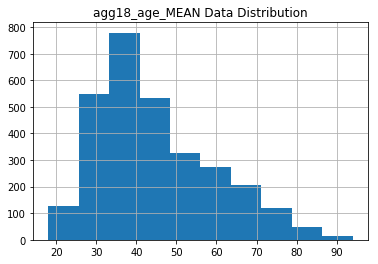

Feature: SQBage, Number of NA's: 0


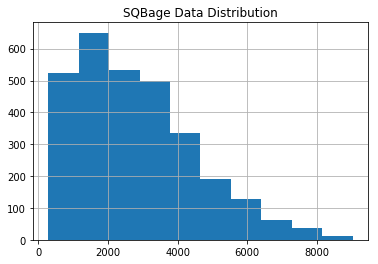

Feature: agg18_age_MAX, Number of NA's: 0


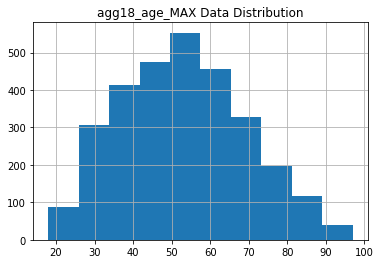

Feature: agg18_age_MIN, Number of NA's: 0


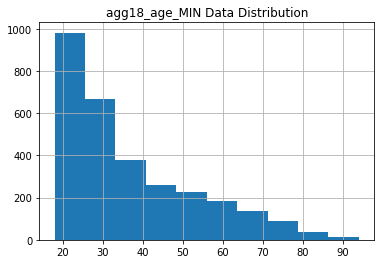

Feature: agg18_escolari_MEAN, Number of NA's: 0


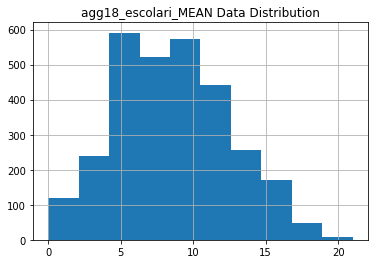

Feature: SQBmeaned, Number of NA's: 0


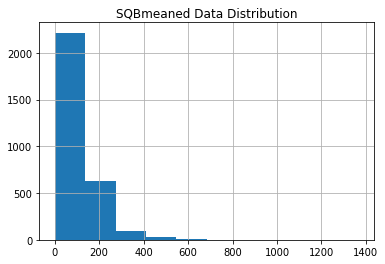

Feature: agg18_escolari_MAX, Number of NA's: 0


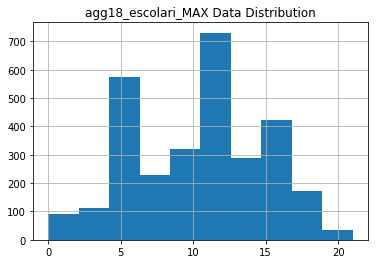

Feature: fe_rent_per_person, Number of NA's: 2156


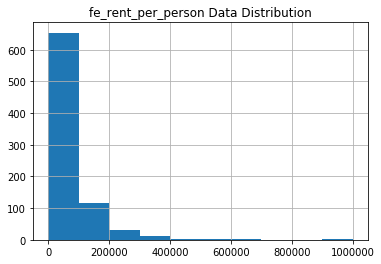

Feature: SQBescolari, Number of NA's: 0


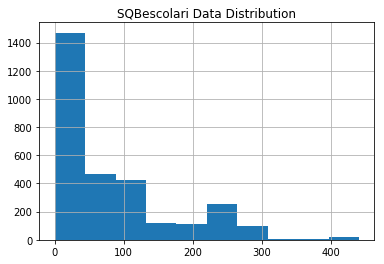

Feature: SQBdependency, Number of NA's: 0


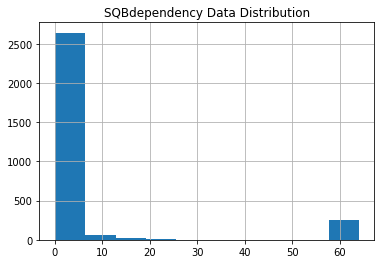

In [127]:
for i in top_feature_list:
    print("Feature: {}, Number of NA's: {}".format(i, X_train[i].isna().sum()))
    X_train[i].hist()
    plt.title("{} Data Distribution".format(i))
    plt.show()

In [136]:
# Show correlation of these features + target
df_corr = pd.DataFrame(X_train[top_feature_list])
df_corr['target'] =y_train
df_corr.shape

(2973, 11)

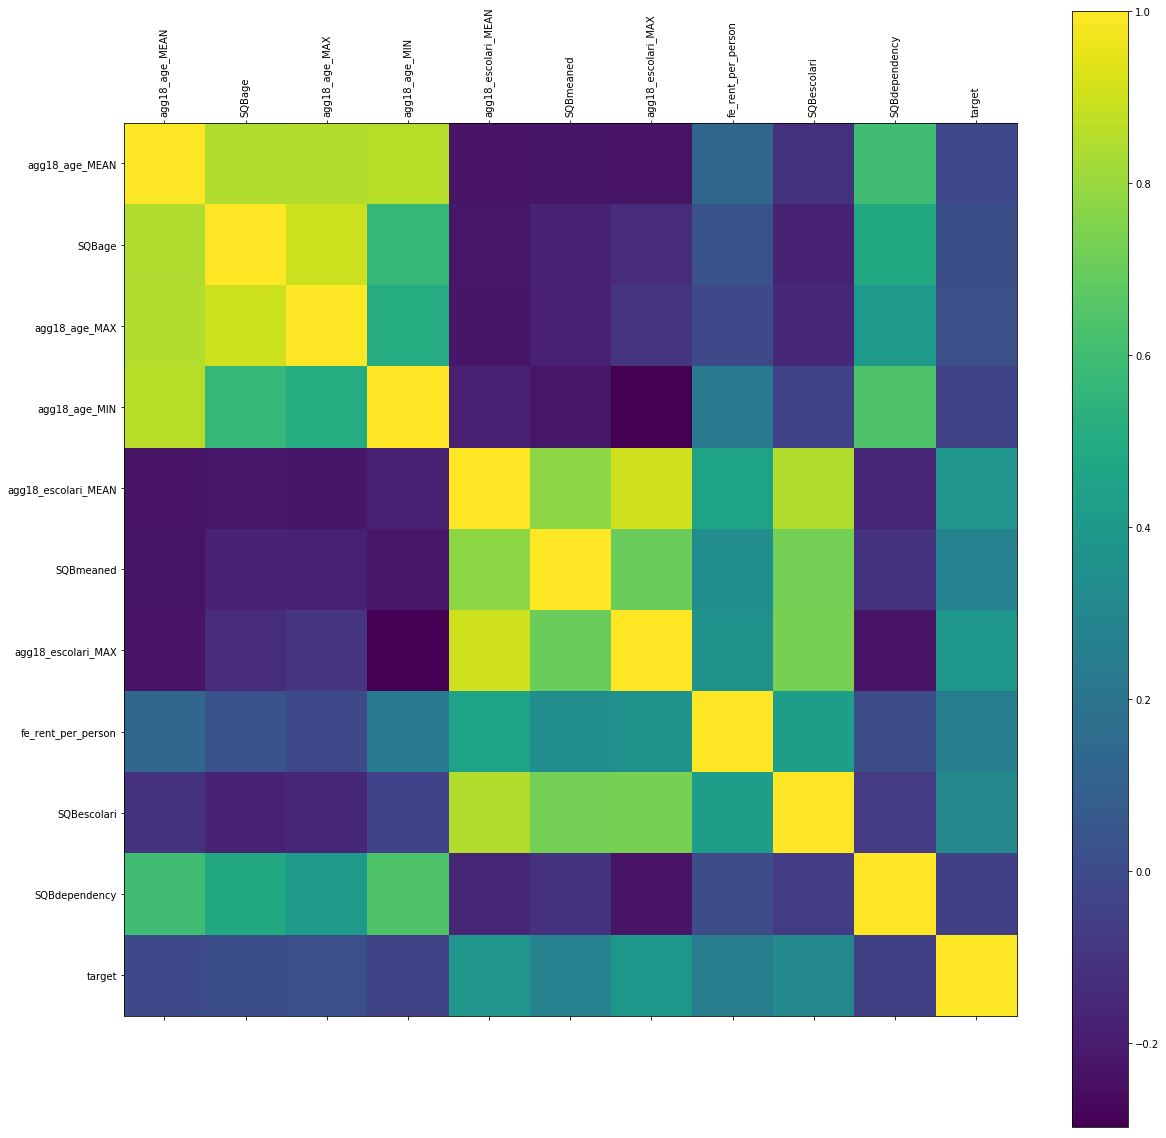

In [138]:
# Correlation plot for 10 most important features + target
alpha = df_corr.columns

plt.figure(figsize=(20,20))
plt.matshow(df_corr.corr(), fignum=1)
plt.colorbar()
plt.xticks(np.arange(0,len(alpha)), ['']+alpha, rotation = 'vertical')
plt.yticks(np.arange(0,len(alpha)), ['']+alpha)
plt.legend()